# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


In [3]:
#cities = cities[:5]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url =f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
         
        response = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                      "Lat": city_lat, 
                      "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | kununurra
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | hadibu
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | duyun
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | la passe
Processing Record 9 of Set 1 | yamada
Processing Record 10 of Set 1 | kalmunai
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | aksu
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | mantenopolis
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | pokhvistnevo
Processing Record 19 of Set 1 | ta`u
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of Set 1 | chibougamau
Proces

In [5]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,45.00,61,100,18.10,JP,1710276795
1,kununurra,-15.7667,128.7333,78.78,94,100,5.75,AU,1710276749
2,avarua,-21.2078,-159.7750,82.45,83,75,9.22,CK,1710276795
3,hadibu,12.6500,54.0333,78.67,80,10,6.93,YE,1710276795
4,vorgashor,67.5833,63.9500,10.74,93,100,27.04,RU,1710276796


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,45.00,61,100,18.10,JP,1710276795
1,kununurra,-15.7667,128.7333,78.78,94,100,5.75,AU,1710276749
2,avarua,-21.2078,-159.7750,82.45,83,75,9.22,CK,1710276795
3,hadibu,12.6500,54.0333,78.67,80,10,6.93,YE,1710276795
4,vorgashor,67.5833,63.9500,10.74,93,100,27.04,RU,1710276796


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

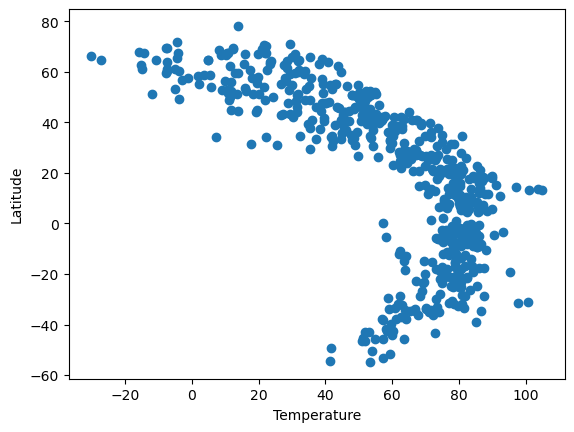

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Max Temp']
y_values = city_data_df['Lat']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [11]:
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

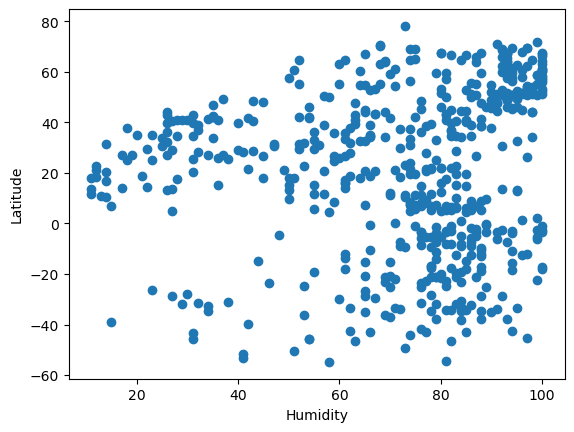

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Humidity']
y_values = city_data_df['Lat']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [13]:
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

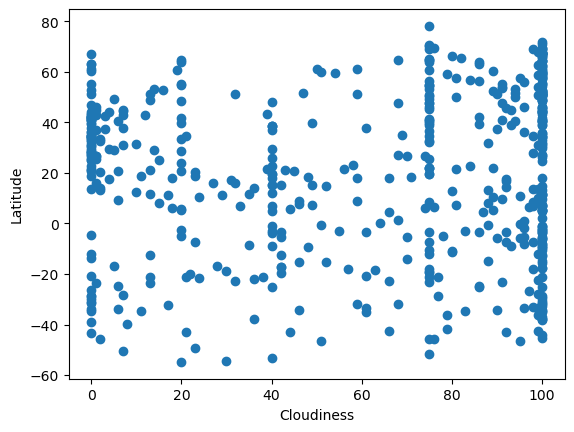

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Cloudiness']
y_values = city_data_df['Lat']
plt.scatter(x_values,y_values)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

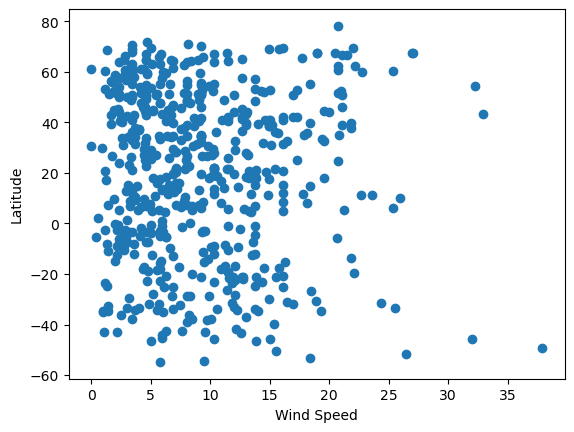

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Wind Speed']
y_values = city_data_df['Lat']
plt.scatter(x_values,y_values)
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def calculate_linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, r_value, p_value, std_err



In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,45.00,61,100,18.10,JP,1710276795
3,hadibu,12.6500,54.0333,78.67,80,10,6.93,YE,1710276795
4,vorgashor,67.5833,63.9500,10.74,93,100,27.04,RU,1710276796
5,duyun,26.2667,107.5167,55.76,97,100,3.38,CN,1710276796
6,ilulissat,69.2167,-51.1000,12.22,92,75,3.44,GL,1710276594


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kununurra,-15.7667,128.7333,78.78,94,100,5.75,AU,1710276749
2,avarua,-21.2078,-159.7750,82.45,83,75,9.22,CK,1710276795
10,adamstown,-25.0660,-130.1015,78.22,76,86,6.85,PN,1710276797
13,papatowai,-46.5619,169.4708,51.84,63,51,13.89,NZ,1710276806
14,mantenopolis,-18.8625,-41.1228,74.39,88,30,4.76,BR,1710276806


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7318140626888867


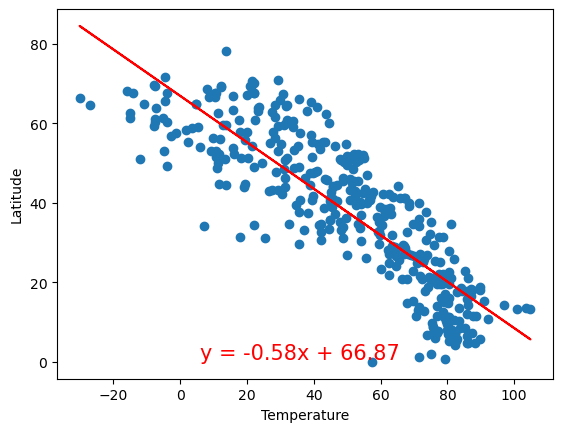

<Figure size 640x480 with 0 Axes>

In [31]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/FigMT.png")

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (169,) and (392,)

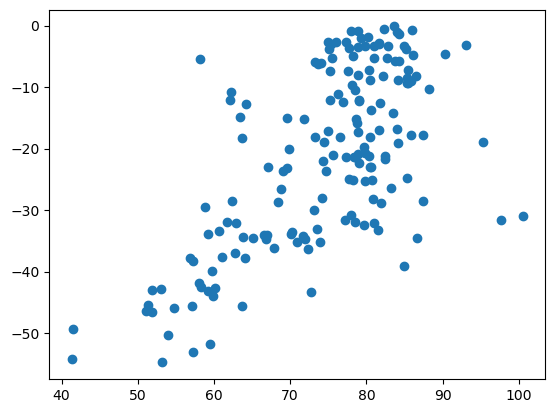

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.annotate(line_eq,fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/FigMT2.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [23]:
# Northern Hemisphere
# YOUR CODE HERE

In [24]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [25]:
# Northern Hemisphere
# YOUR CODE HERE

In [26]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE